In [3]:
import pandas as pd

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

Read In imdb_1000.csv file and stored it in 'movies'

In [46]:
movies = pd.read_csv('../data/imdb_1000.csv')

Check the number of row and columns

In [7]:
movies.shape

(979, 6)

Check the data types of each column

In [8]:
movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

Calculate the average movie duration

In [9]:
movies.duration.mean()

120.97957099080695

Sort the data frame to find the shortest...

In [10]:
movies.sort_values('duration').head(1)

,star_rating,title,content_rating,genre,duration,actors_list
389,8,Freaks,UNRATED,Drama,64,"[u'Wallace Ford', u'Leila Hyams', u'Olga Bacla..."


...and longest  movies.

In [11]:
movies.sort_values('duration').tail(1)

,star_rating,title,content_rating,genre,duration,actors_list
476,7.8,Hamlet,PG-13,Drama,242,"[u'Kenneth Branagh', u'Julie Christie', u'Dere..."


Create a histogram of duration.

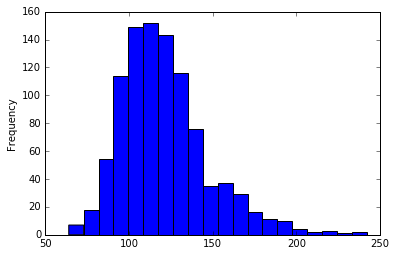

In [12]:
movies.duration.plot(kind='hist',bins=20)

Use a box plot to display that same data.

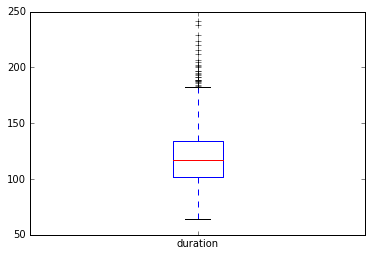

In [13]:
movies.duration.plot(kind='box')

Count how many movies have each of the content ratings.

In [14]:
movies.content_rating.value_counts()

R            460
PG-13        189
PG           123
NOT RATED     65
APPROVED      47
UNRATED       38
G             32
PASSED         7
NC-17          7
X              4
GP             3
TV-MA          1
Name: content_rating, dtype: int64

Use a visualization to display that same data, including a title and x and y labels.

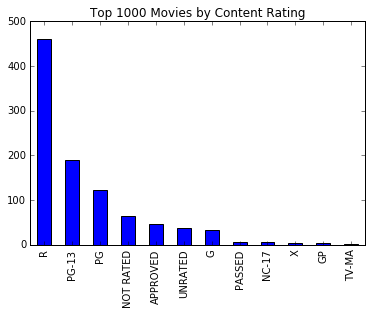

In [15]:
movies.content_rating.value_counts().plot(kind='bar',title='Top 1000 Movies by Content Rating')

Convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP

In [52]:
movies = movies.replace(['NOT RATED','APPROVED','PASSED','GP'],['UNRATED','UNRATED','UNRATED','UNRATED'])

Convert the following content ratings to "NC-17": X, TV-MA

In [51]:
movies = movies.replace(['X','TV-MA'],['NC-17','NC-17'])

Count the number of missing values in each column

In [53]:
movies.isnull().sum()

star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

If there are missing values: examine them,...

In [54]:
movies[movies.isnull().any(axis=1)]

,star_rating,title,content_rating,genre,duration,actors_list
187,8.2,Butch Cassidy and the Sundance Kid,NaN,Biography,110,"[u'Paul Newman', u'Robert Redford', u'Katharin..."
649,7.7,Where Eagles Dare,NaN,Action,158,"[u'Richard Burton', u'Clint Eastwood', u'Mary ..."
936,7.4,True Grit,NaN,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


...then fill them in with "reasonable" values.

In [55]:
movies = movies.replace('NaN','PG')

Calculate the average star rating for movies 2 hours or longer, and compare that with the average star rating for movies shorter than 2 hours.

In [69]:
movies.groupby(movies.duration > 120).star_rating.count()

duration
False    543
True     436
Name: star_rating, dtype: int64

In [70]:
movies.groupby(movies.duration > 120).star_rating.sum()

duration
False    4256.3
True     3467.8
Name: star_rating, dtype: float64

In [71]:
movies.groupby(movies.duration > 120).star_rating.mean()

duration
False    7.83849
True     7.95367
Name: star_rating, dtype: float64

Use a visualization to detect whether there is a relationship between duration and star rating

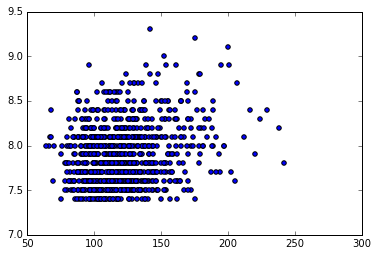

In [76]:
plt.scatter(movies.duration,movies.star_rating)

In [82]:
import numpy as np

In [83]:
fit = np.polyfit(movies.duration,movies.star_rating, deg =1)

In [84]:
ax.plot(movies.duration,fit[0]*movies.duration + fit[1],color='red')

In [85]:
ax.scatter(movies.duration,movies.star_rating)

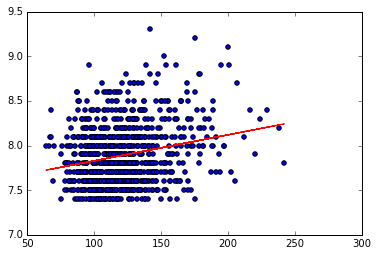

In [87]:
fig

Calculate the average duration for each genre.

In [90]:
movies.groupby(movies.genre).duration.mean()

genre
Action       126.485294
Adventure    134.840000
Animation     96.596774
Biography    131.844156
Comedy       107.602564
Crime        122.298387
Drama        126.539568
Family       107.500000
Fantasy      112.000000
Film-Noir     97.333333
History       66.000000
Horror       102.517241
Mystery      115.625000
Sci-Fi       109.000000
Thriller     114.200000
Western      136.666667
Name: duration, dtype: float64

Visualize the realtionship between content rating and duration

content_rating
G          Axes(0.125,0.125;0.775x0.775)
NC-17      Axes(0.125,0.125;0.775x0.775)
PG         Axes(0.125,0.125;0.775x0.775)
PG-13      Axes(0.125,0.125;0.775x0.775)
R          Axes(0.125,0.125;0.775x0.775)
UNRATED    Axes(0.125,0.125;0.775x0.775)
Name: duration, dtype: object

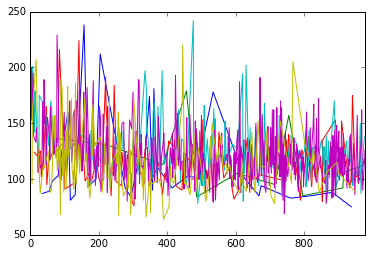

In [135]:
movies.groupby(movies.content_rating).duration.plot(kind='bar',stacked=True)

Determine the top rated movie (by star rating) for each genre.

In [96]:
movies.groupby(movies.genre).star_rating.max()

genre
Action       9.0
Adventure    8.9
Animation    8.6
Biography    8.9
Comedy       8.6
Crime        9.3
Drama        8.9
Family       7.9
Fantasy      7.7
Film-Noir    8.3
History      8.0
Horror       8.6
Mystery      8.6
Sci-Fi       8.2
Thriller     8.0
Western      8.9
Name: star_rating, dtype: float64

Check if there are multiple movies with the same title, and if so, determine if they are actually duplicates.

In [99]:
movies[movies.duplicated('title')]

,star_rating,title,content_rating,genre,duration,actors_list
482,7.8,The Girl with the Dragon Tattoo,R,Crime,152,"[u'Michael Nyqvist', u'Noomi Rapace', u'Ewa Fr..."
905,7.5,Dracula,R,Horror,128,"[u'Gary Oldman', u'Winona Ryder', u'Anthony Ho..."
924,7.5,Les Miserables,PG-13,Crime,134,"[u'Liam Neeson', u'Geoffrey Rush', u'Uma Thurm..."
936,7.4,True Grit,NaN,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


Calculate the average star rating for each genre, but only include genres with at least 10 movies.

In [101]:
movies.groupby(movies.genre).star_rating.max()

genre
Action       9.0
Adventure    8.9
Animation    8.6
Biography    8.9
Comedy       8.6
Crime        9.3
Drama        8.9
Family       7.9
Fantasy      7.7
Film-Noir    8.3
History      8.0
Horror       8.6
Mystery      8.6
Sci-Fi       8.2
Thriller     8.0
Western      8.9
Name: star_rating, dtype: float64

In [106]:
movies.genre.value_counts()

Drama        278
Comedy       156
Action       136
Crime        124
Biography     77
Adventure     75
Animation     62
Horror        29
Mystery       16
Western        9
Thriller       5
Sci-Fi         5
Film-Noir      3
Family         2
Fantasy        1
History        1
Name: genre, dtype: int64